# Superpose the map of the layers best predicting the activation

In [94]:
from nilearn import plotting
from nilearn.plotting import plot_stat_map, plot_roi
from nilearn.image import load_img, threshold_img, math_img, new_img_like
from nilearn.plotting import view_img_on_surf, view_img
import os
import numpy as np
import matplotlib.pyplot as plt
from joblib import load, dump
import tqdm

In [9]:
results = "results/victor/parcellation_conv{}/fold{}_sub{:02d}alpha0.0001_1000neurons.nii.gz"
correspondance = {
    0 : 0,
    2 : 1,
    5 : 2,
    7 : 3,
    10: 4,
    12: 5,
    15: 6,
    17: 7
}


In [27]:
indexes = list(range(1,18))
indexes.pop(4)
d = {}
best_folds = load("best_fold.pkl")
print(best_folds)
for index, id_subject in enumerate(indexes):
    folds = best_folds[id_subject]
    d[id_subject] = {
                    5 : folds[5],
                    6 : folds[6],
                    7 : folds[7],
                    }
dump(d, "best_fold.pkl")

{1: {5: 4, 6: 4, 7: 1}, 2: {5: 1, 6: 4, 7: 4}, 3: {5: 4, 6: 3, 7: 4}, 4: {5: 1, 6: 1, 7: 1}, 6: {5: 1, 6: 1, 7: 4}, 7: {5: 4, 6: 1, 7: 4}, 8: {5: 4, 6: 4, 7: 4}, 9: {5: 3, 6: 3, 7: 4}, 10: {5: 1, 6: 1, 7: 1}, 11: {5: 1, 6: 1, 7: 3}, 12: {5: 1, 6: 4, 7: 4}, 13: {5: 4, 6: 4, 7: 3}, 14: {5: 4, 6: 4, 7: 4}, 15: {5: 1, 6: 1, 7: 3}, 16: {5: 4, 6: 4, 7: 4}, 17: {5: 4, 6: 4, 7: 3}}


['best_fold.pkl']

In [143]:
def plot_conv(id_subject):
    fmri_anat = "fmri_anat/sub-{:02d}.nii.gz".format(id_subject)
    fmri_mean = "fmri_mean/sub{:02d}.nii.gz".format(id_subject)
    fold5 = d[id_subject][5]
    result5 = results.format(5,fold5, id_subject)
    fold6 = d[id_subject][6]
    result6 = results.format(6, fold6, id_subject)
    fold7 = d[id_subject][7]
    result7 = results.format(7, fold7, id_subject)

    img5 = load_img(result5)
    img6 = load_img(result6)
    img7 = load_img(result7)

    seuil = 0.1
    threshold_operation = "img1>{}".format(seuil)
    
    data5 = math_img(threshold_operation, img1 = result5)

    data6 = math_img(threshold_operation, img1 = result6)

    data7 = math_img(threshold_operation, img1 = result7)


    img5bis = math_img("2 * img", img = data5)
    img6bis = math_img("5 * img", img = data6)
    img7bis = math_img("10 * img", img = data7)
   
    img_sum = math_img("img1 + img2 + img3", img1 = img5bis, img2 = img6bis, img3 = img7bis)

    sum_data = img_sum.get_data()
    
    for k in np.unique(sum_data):
        np.place(sum_data, sum_data == k, correspondance[int(k)])
    img_sum =  new_img_like(fmri_mean, sum_data)
    img = plot_roi(img_sum, colorbar=True, bg_img = fmri_anat, vmax = 8, cmap = plt.cm.Set2, black_bg = False)
    img_sum.to_filename("sum_map_new/subject{}.nii.gz".format(id_subject))
    img.savefig("png_images_new/subject{}_xyz.png".format(id_subject))

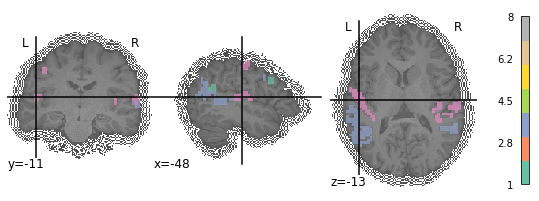

In [144]:
plot_conv(1)

100%|██████████| 16/16 [01:35<00:00,  6.43s/it]


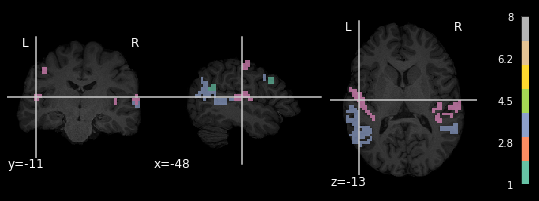

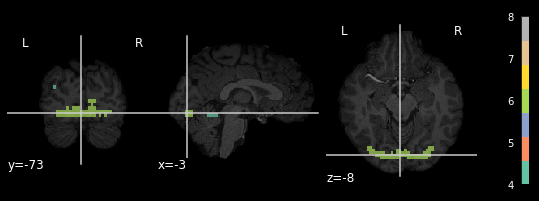

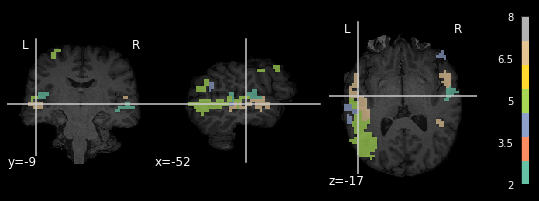

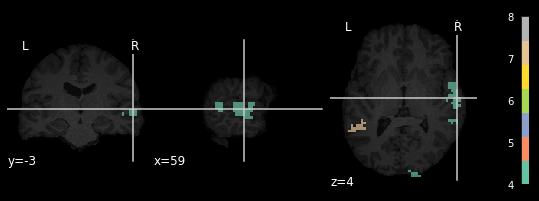

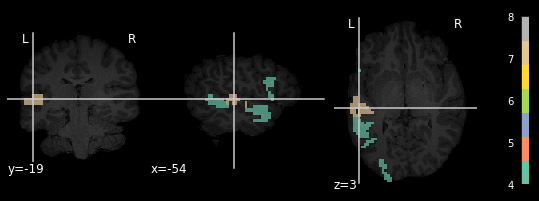

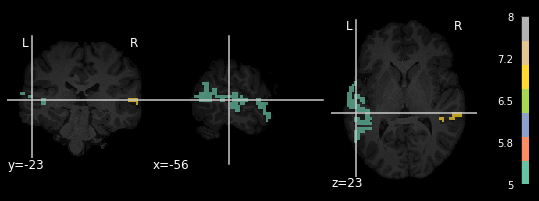

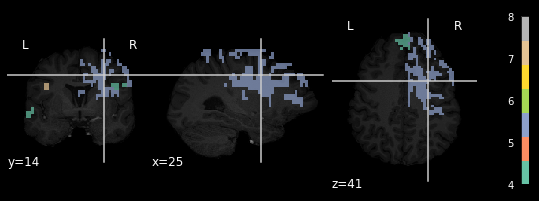

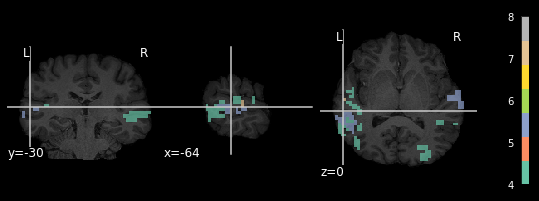

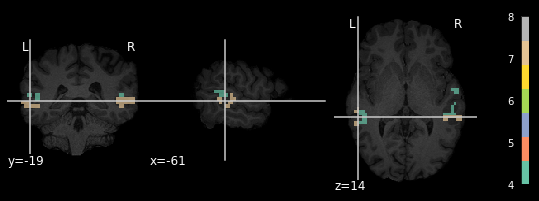

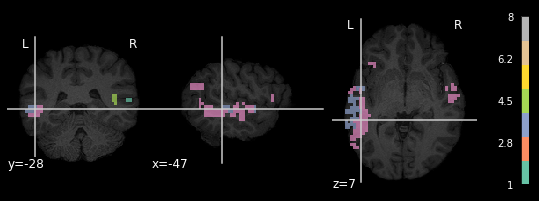

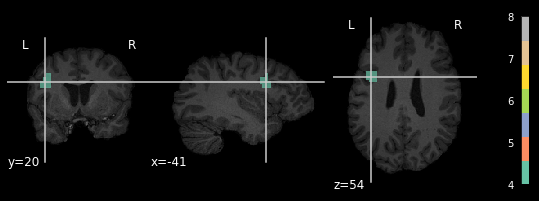

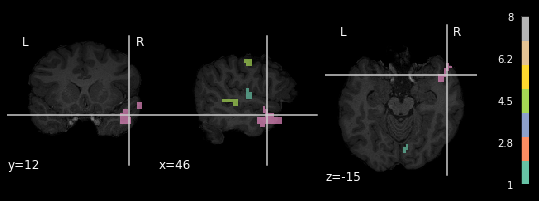

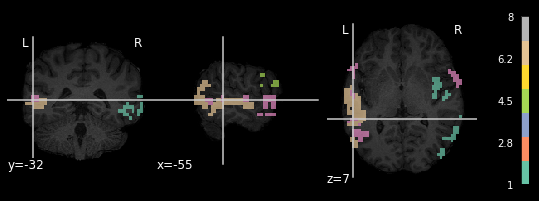

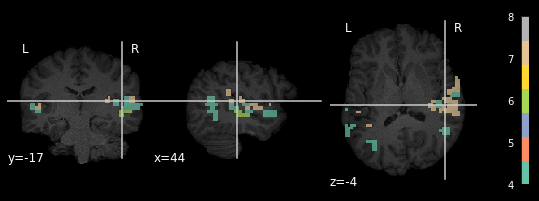

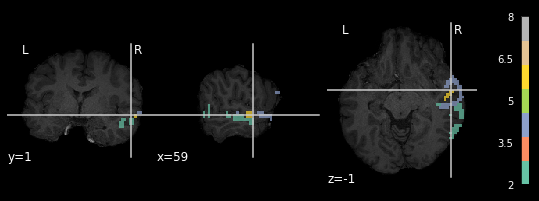

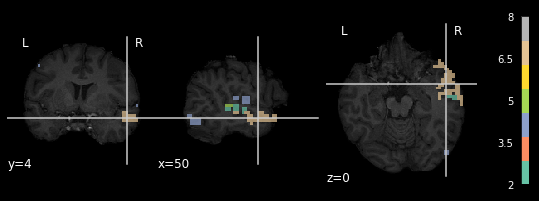

In [103]:
for id_subject in tqdm.tqdm(indexes) : 
    plot_conv(id_subject)
    